In [1]:
# scan data directories
import glob

nature_file_list = []
nature_file_list += glob.glob('../data/interim/AmbisonicSoundLibrary/nature/*')
nature_file_list += glob.glob('../data/interim/GoogleAudioSet/Outside, rural or natural/*')
nature_file_list += glob.glob('../data/interim/youtube/NatureSoundscapes/*')
nature_file_list += glob.glob('../data/interim/youtube/NomadicAmbience_nature/*')
nature_file_list += glob.glob('../data/interim/S2L_LULC/non_urban/*')
nature_file_list += glob.glob('../data/interim/S2L_LULC/urban_0_25/*')

city_file_list = []
city_file_list += glob.glob('../data/interim/GoogleAudioSet/Outside, urban or manmade/*')
city_file_list += glob.glob('../data/interim/youtube/NomadicAmbience_city/*')
city_file_list += glob.glob('../data/interim/SONYC/**/*.pkl')
city_file_list += glob.glob('../data/interim/S2L_LULC/urban_26_100/*')


In [2]:
import pickle
import pandas as pd
import numpy as np

df_indices_all = []
df_indices_bg = []
df_indices_fg = []
mps_all = []
mps_bg = []
mps_fg = []
for filename in nature_file_list:
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df_indices_all.append(output['df_indices'])
    df_indices_bg.append(output['df_indices_bg'])
    df_indices_fg.append(output['df_indices_fg'])
    mps_all.append(output['mps'])
    mps_fg.append(output['mps_fg'])
    mps_bg.append(output['mps_bg'])

    # close the file
    file.close()
df_indices_nature = pd.concat(df_indices_all)
df_indices_bg_nature = pd.concat(df_indices_bg)
df_indices_fg_nature = pd.concat(df_indices_fg)
mps_nature = np.stack(mps_all, axis=2)
mps_bg_nature = np.stack(mps_bg, axis=2)
mps_fg_nature = np.stack(mps_fg, axis=2)


df_indices_all = []
df_indices_bg = []
df_indices_fg = []
mps_all = []
mps_bg = []
mps_fg = []
for filename in city_file_list:
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df_indices_all.append(output['df_indices'])
    df_indices_bg.append(output['df_indices_bg'])
    df_indices_fg.append(output['df_indices_fg'])
    mps_all.append(output['mps'])
    mps_fg.append(output['mps_fg'])
    mps_bg.append(output['mps_bg'])

    # close the file
    file.close()
df_indices_city = pd.concat(df_indices_all)
df_indices_bg_city = pd.concat(df_indices_bg)
df_indices_fg_city = pd.concat(df_indices_fg)
mps_city = np.stack(mps_all, axis=2)
mps_bg_city = np.stack(mps_bg, axis=2)
mps_fg_city= np.stack(mps_fg, axis=2)

In [3]:
from scipy.stats import ttest_ind, mannwhitneyu
statistic_all, pvalue_all = ttest_ind(df_indices_nature, df_indices_city, nan_policy='omit', equal_var=False)
statistic_bg, pvalue_bg = ttest_ind(df_indices_bg_nature, df_indices_bg_city, nan_policy='omit', equal_var=False)
statistic_fg, pvalue_fg = ttest_ind(df_indices_fg_nature, df_indices_fg_city, nan_policy='omit', equal_var=False)

statistic_mw_all, pvalue_mw_all = mannwhitneyu(df_indices_nature, df_indices_city, nan_policy='omit')
statistic_mw_bg, pvalue_mw_bg = mannwhitneyu(df_indices_bg_nature, df_indices_bg_city, nan_policy='omit')
statistic_mw_fg, pvalue_mw_fg = mannwhitneyu(df_indices_fg_nature, df_indices_fg_city, nan_policy='omit')


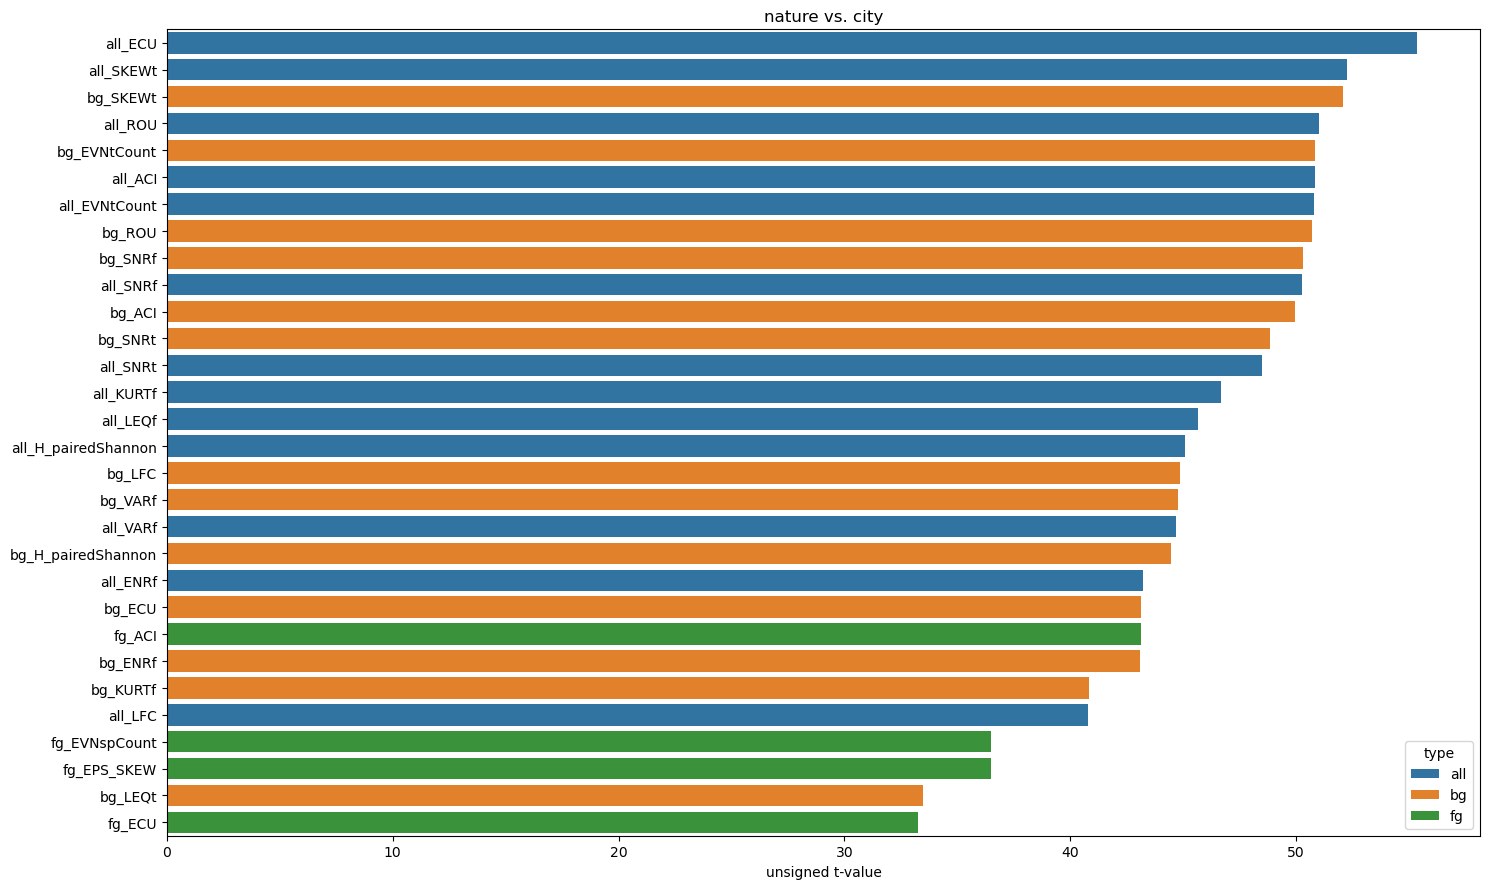

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

tval_df = pd.DataFrame(index = ('all_'+df_indices_nature.columns).union('bg_'+df_indices_bg_nature.columns).union('fg_'+df_indices_fg_nature.columns), 
                       data = np.abs(list(statistic_all.data)+list(statistic_bg.data)+list(statistic_fg.data)),
                       columns = ['stats'])
tval_df['type'] = [i.split('_', 1)[0] for i in tval_df.index]

tval_df.sort_values(by=['stats'], ascending=False, inplace = True)
sel_range = 30
tval_df = tval_df.iloc[:sel_range]

fig, ax = plt.subplots(figsize=(15,9)) 

graph = sns.barplot(y=list(tval_df.index), x=tval_df['stats'], ax=ax, orient = 'h', hue=tval_df['type'], dodge = False)
ax.set_xlabel('unsigned t-value')
plt.title('nature vs. city')
plt.tight_layout()
plt.show()

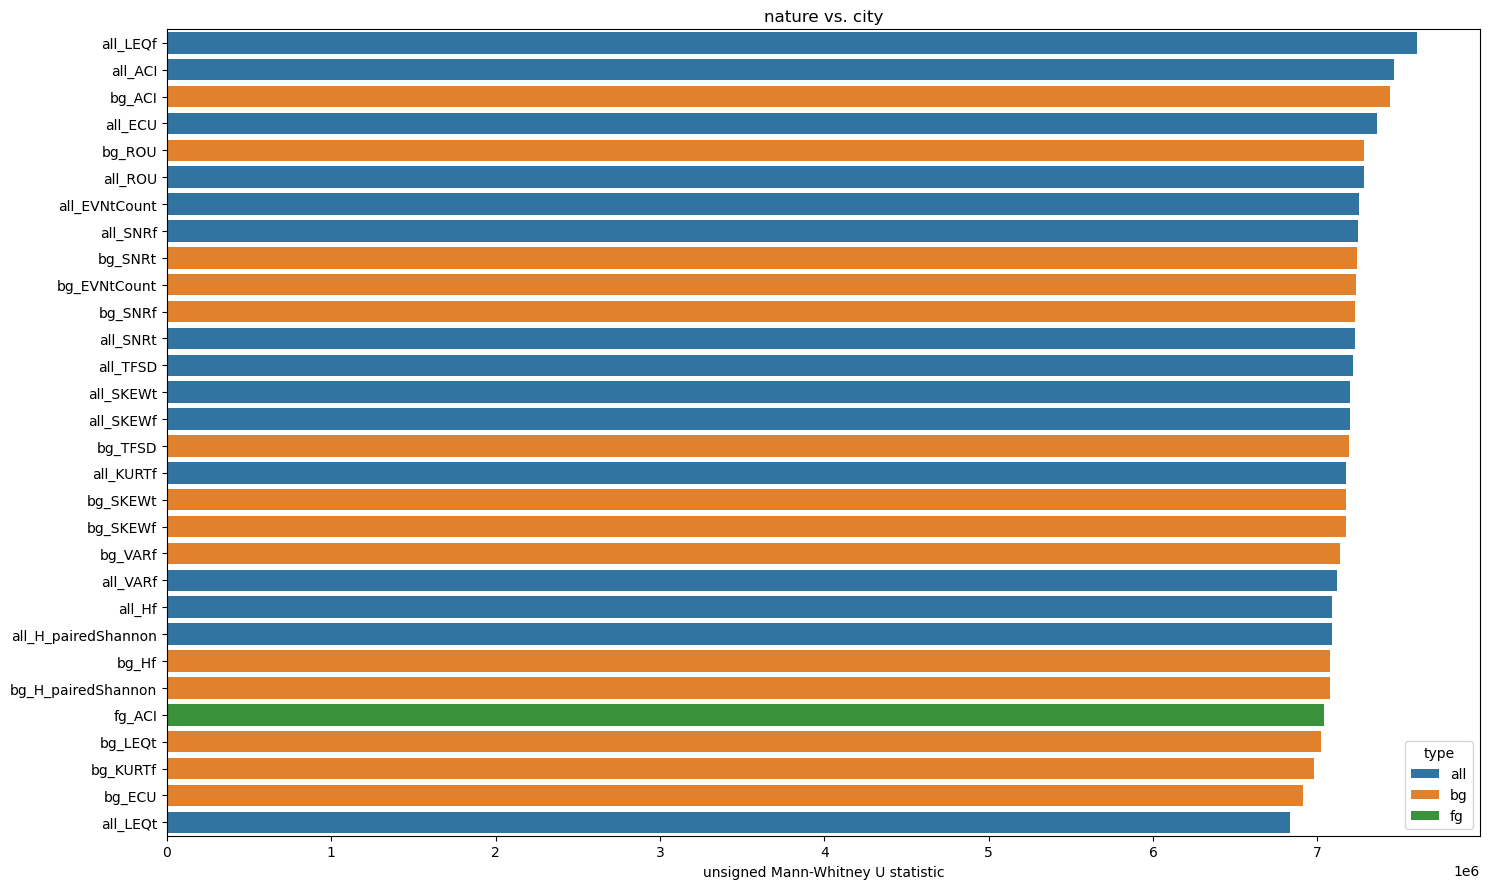

In [5]:
mwval_df = pd.DataFrame(index = ('all_'+df_indices_nature.columns).union('bg_'+df_indices_bg_nature.columns).union('fg_'+df_indices_fg_nature.columns), 
                       data = np.abs(list(statistic_mw_all.data)+list(statistic_mw_bg.data)+list(statistic_mw_fg.data)),
                       columns = ['stats'])
mwval_df['type'] = [i.split('_', 1)[0] for i in mwval_df.index]

mwval_df.sort_values(by=['stats'], ascending=False, inplace = True)
sel_range = 30
mwval_df = mwval_df.iloc[:sel_range]

fig, ax = plt.subplots(figsize=(15,9)) 

graph = sns.barplot(y=list(mwval_df.index), x=mwval_df['stats'], ax=ax, orient = 'h', hue=mwval_df['type'], dodge = False)
ax.set_xlabel('unsigned Mann-Whitney U statistic')
plt.title('nature vs. city')
plt.tight_layout()
plt.show()

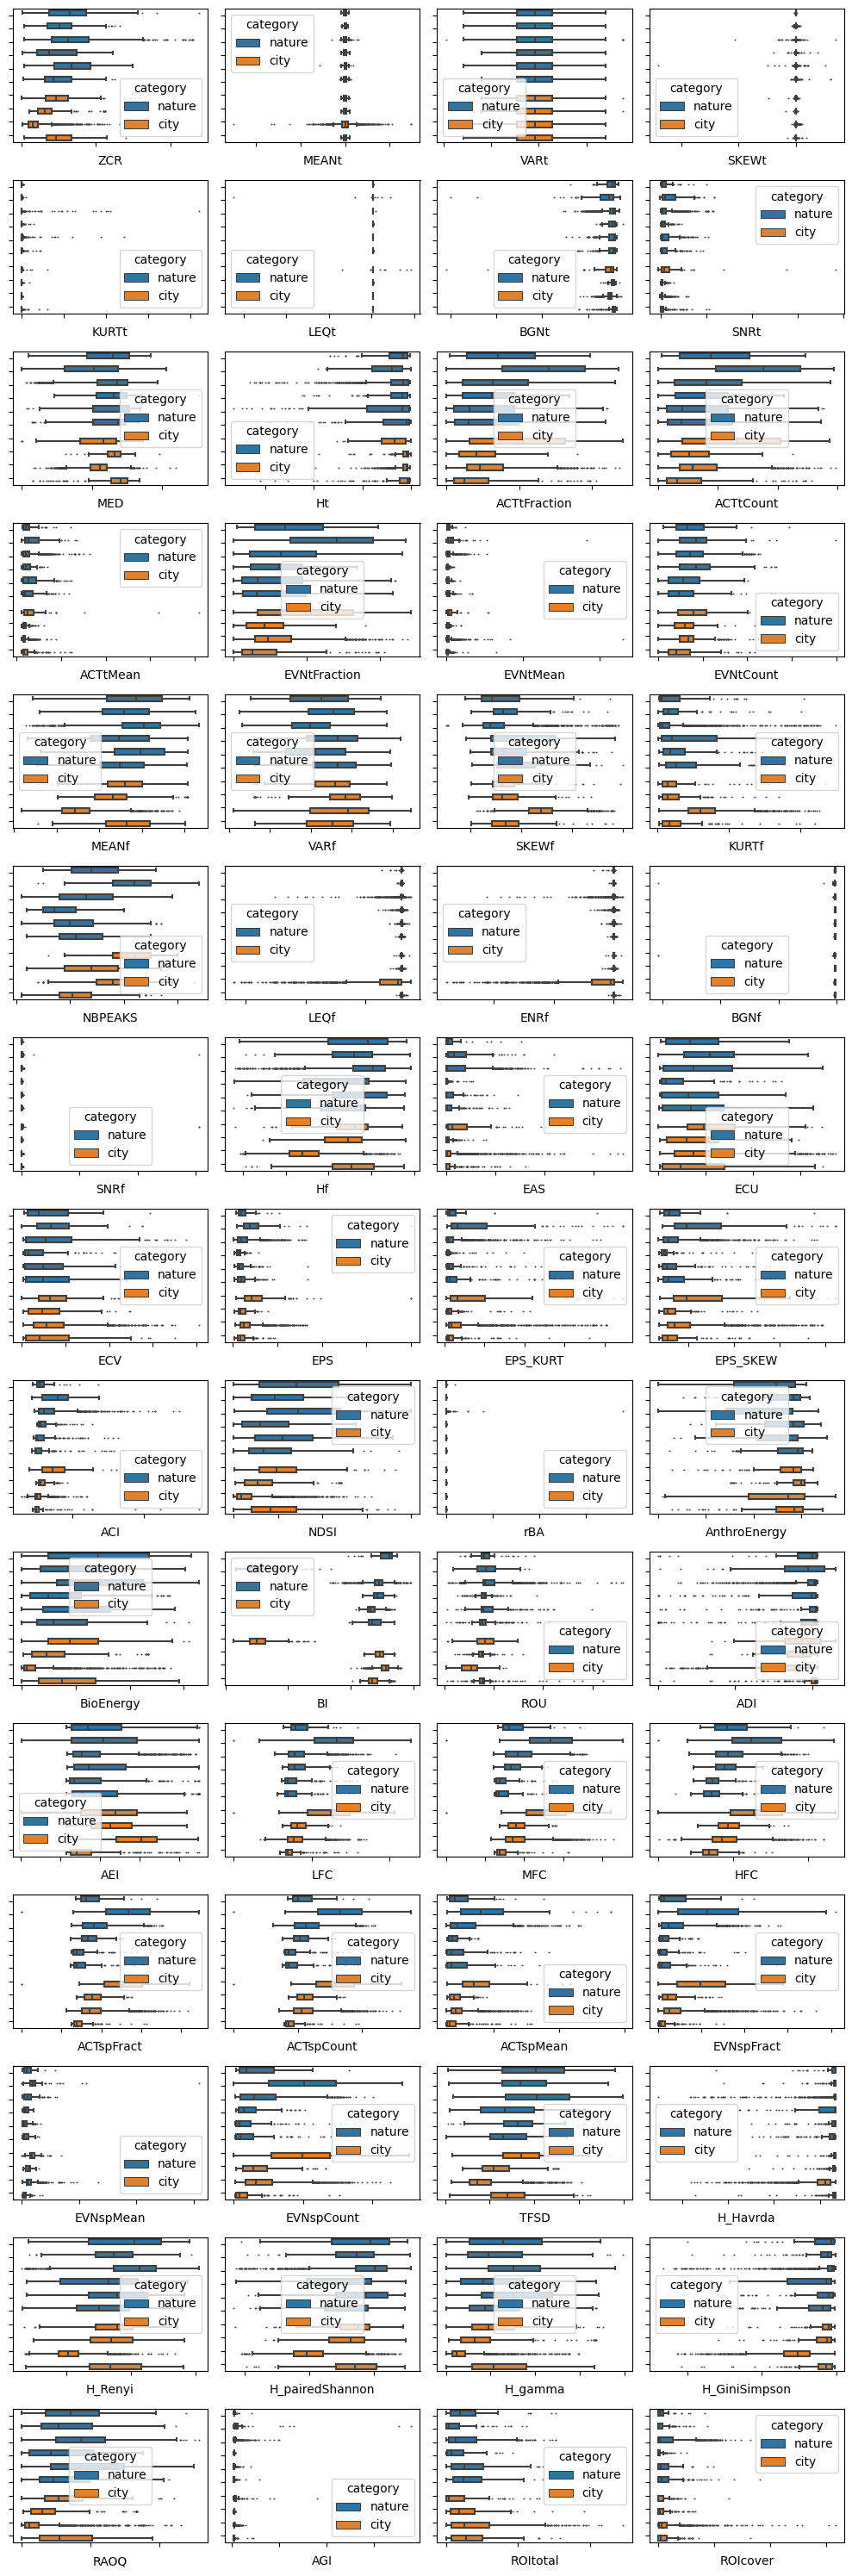

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

nature_source_list = ['nature_'+i.rsplit('/', 2)[1] for i in nature_file_list]
city_source_list = ['city_'+i.rsplit('/', -1)[3] for i in city_file_list]

df_indices_nature['source'] = nature_source_list
df_indices_nature['category'] = 'nature'
df_indices_city['source'] = city_source_list
df_indices_city['category'] = 'city'
df_indices_all = pd.concat([df_indices_nature, df_indices_city])

fig, ax = plt.subplots(15,4, figsize=(10,30))
for n in range(len(df_indices_all.columns)-2):
    n1 = int(np.floor(n/4))
    n2 = n%4
    sns.boxplot(y='source', x=df_indices_all.columns[n], hue='category', data=df_indices_all, ax = ax[n1,n2], fliersize = 0.5)
    ax[n1,n2].set(ylabel=None)
    ax[n1,n2].set(xticklabels=[])
    ax[n1,n2].set(yticklabels=[])
    plt.tight_layout()



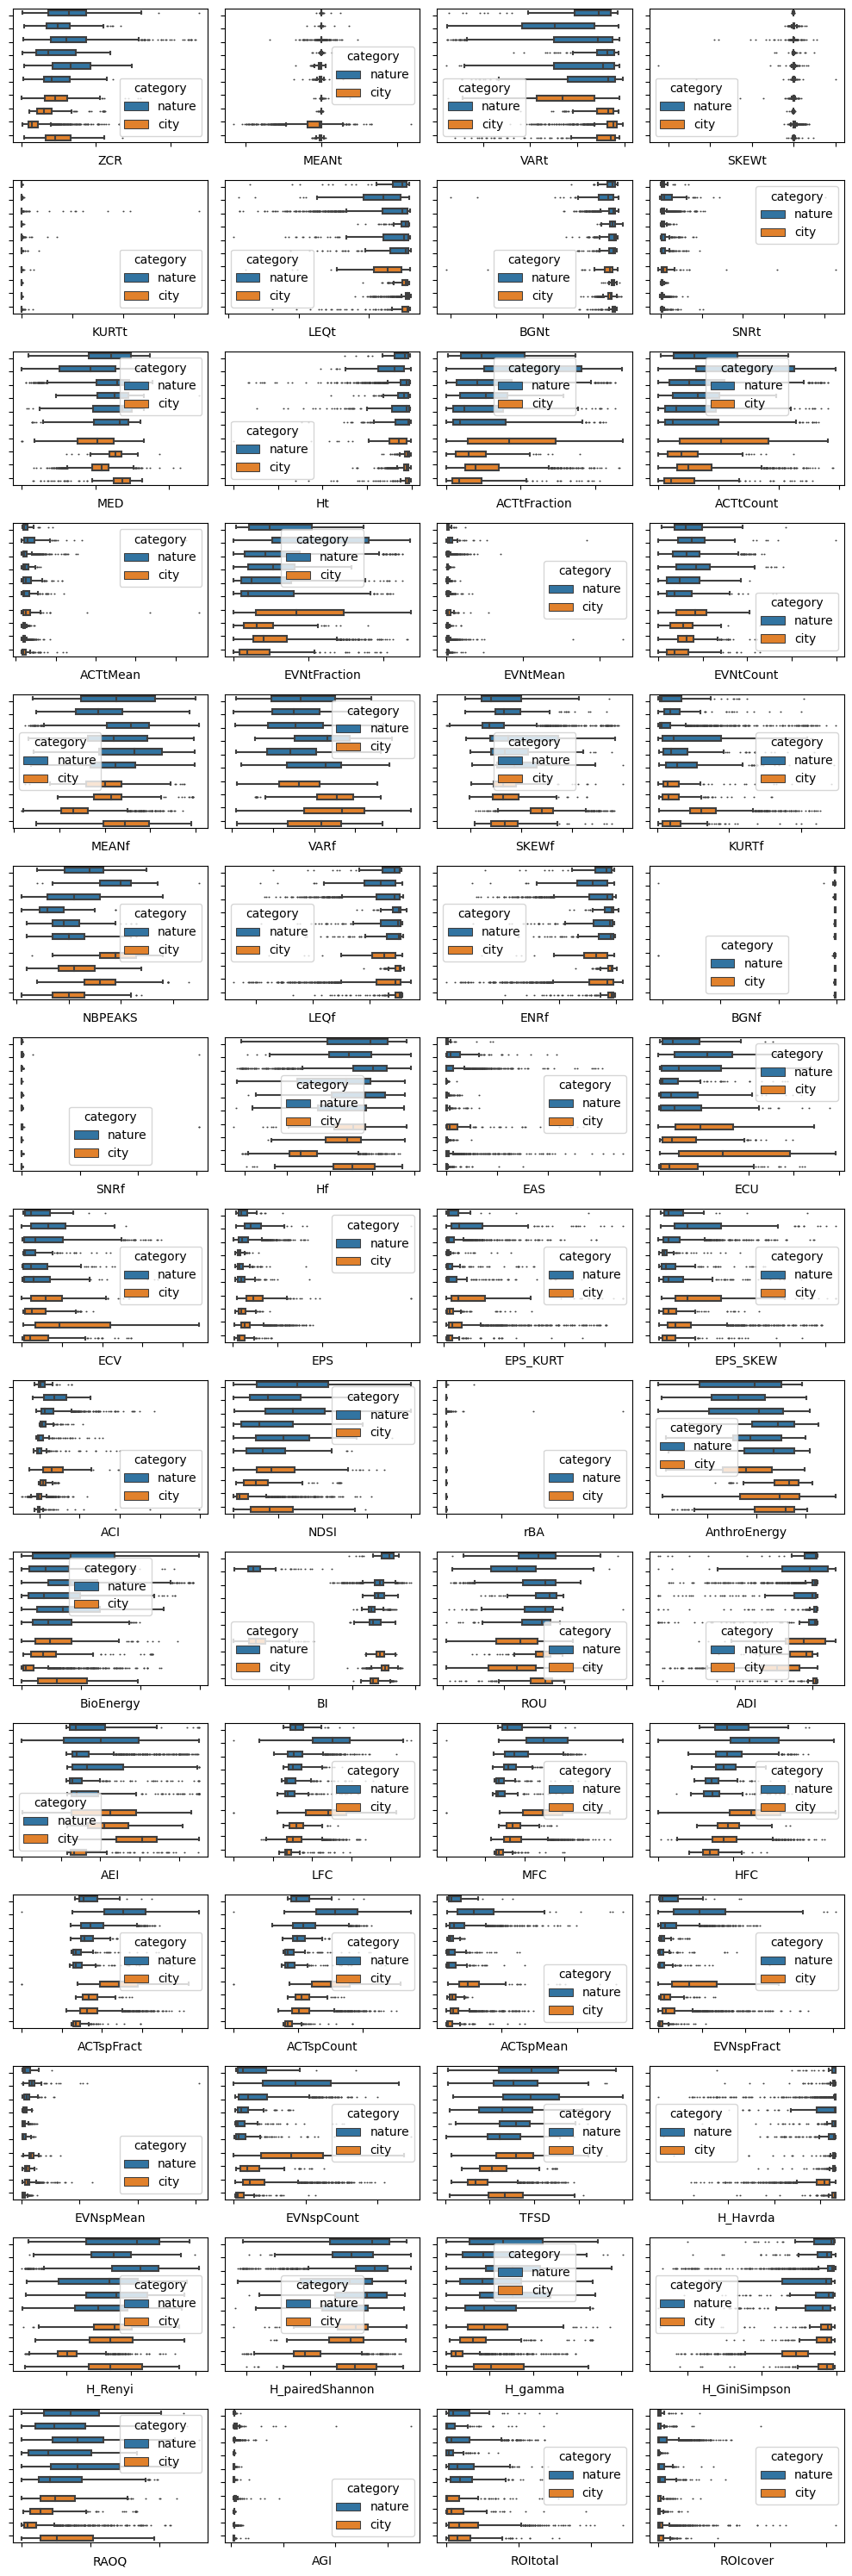

In [7]:
nature_source_list = ['nature_'+i.rsplit('/', 2)[1] for i in nature_file_list]
city_source_list = ['city_'+i.rsplit('/', -1)[3] for i in city_file_list]

df_indices_bg_nature['source'] = nature_source_list
df_indices_bg_nature['category'] = 'nature'
df_indices_bg_city['source'] = city_source_list
df_indices_bg_city['category'] = 'city'
df_indices_bg_all = pd.concat([df_indices_bg_nature, df_indices_bg_city])

fig, ax = plt.subplots(15,4, figsize=(10,30))
for n in range(len(df_indices_bg_all.columns)-2):
    n1 = int(np.floor(n/4))
    n2 = n%4
    sns.boxplot(y='source', x=df_indices_bg_all.columns[n], hue='category', data=df_indices_bg_all, ax = ax[n1,n2], fliersize = 0.5)
#     ax[n1,n2].set(xlabel=None)
    ax[n1,n2].set(ylabel=None)
    ax[n1,n2].set(xticklabels=[])
    ax[n1,n2].set(yticklabels=[])
    plt.tight_layout()

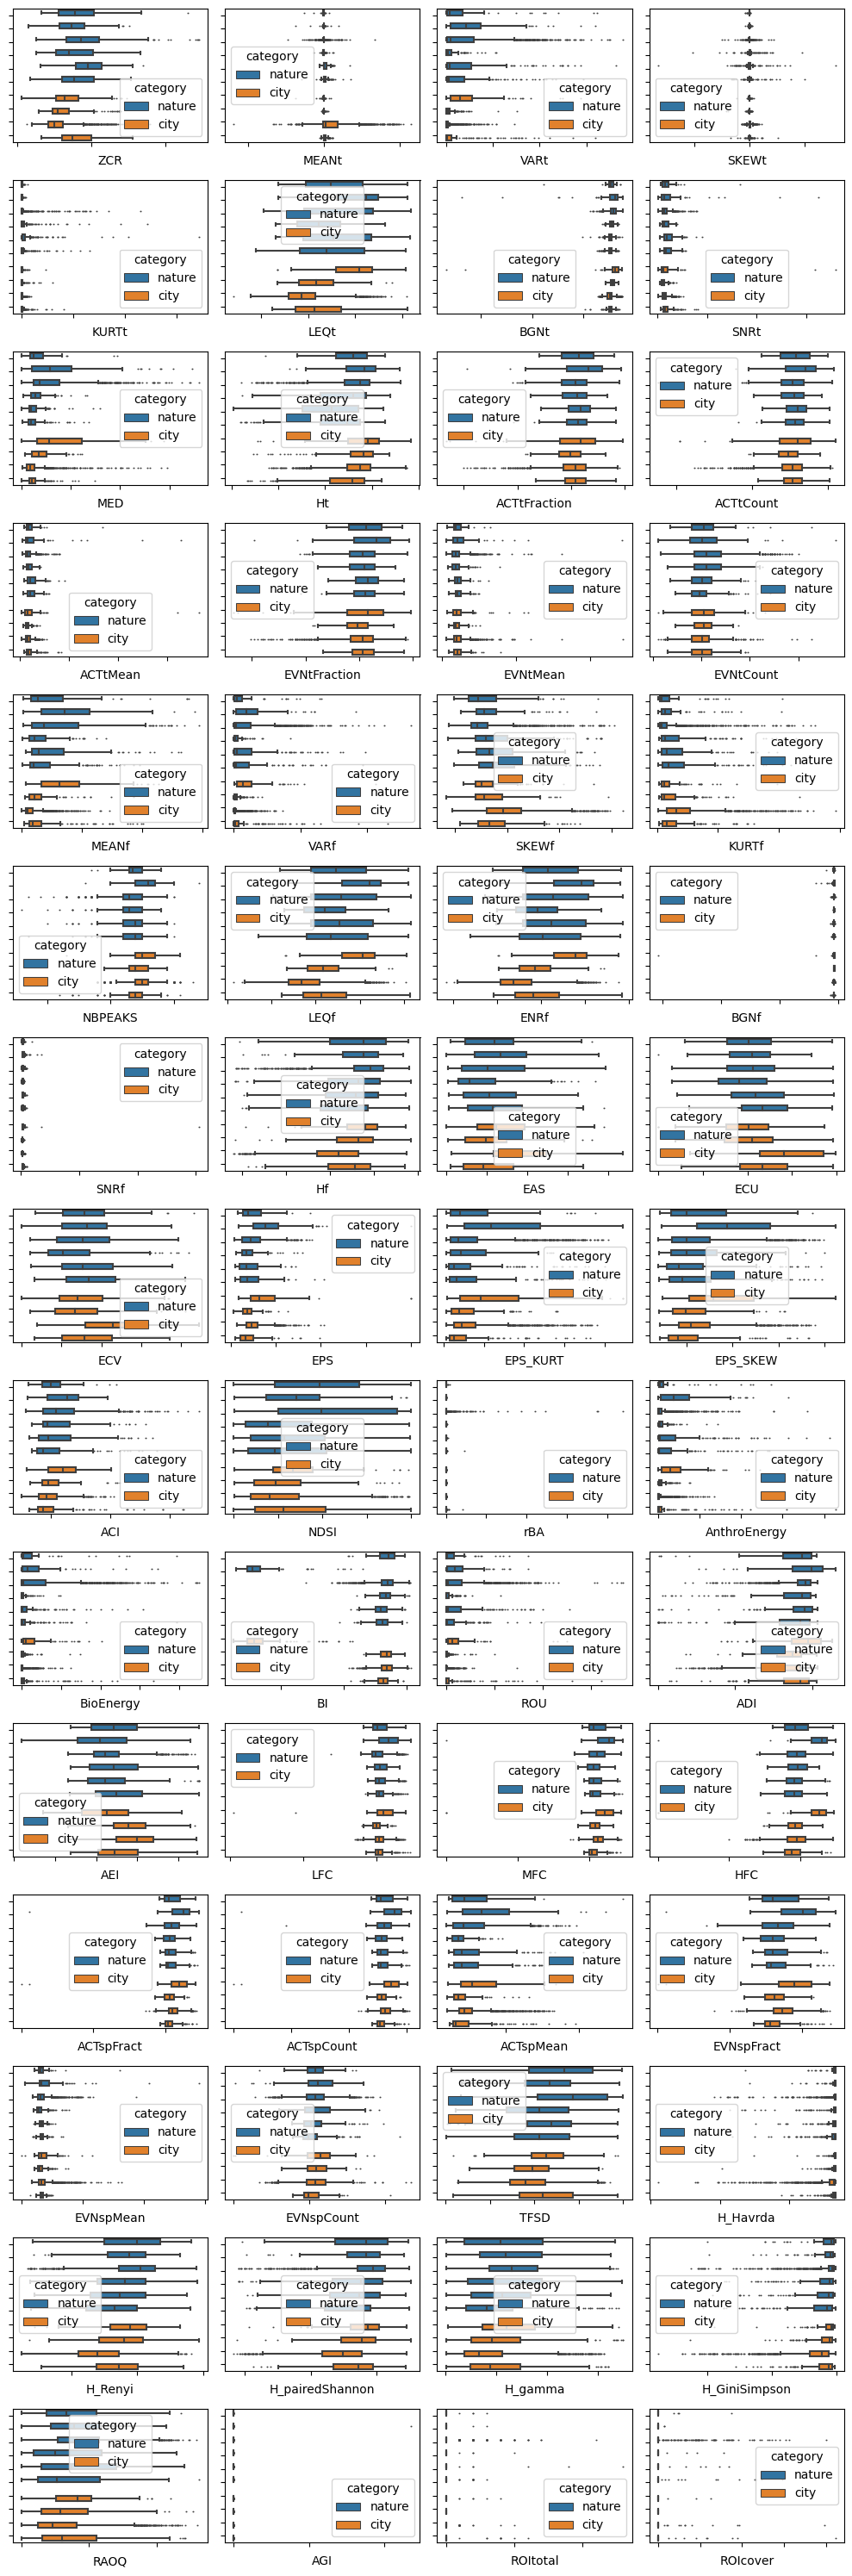

In [8]:
df_indices_fg_nature['source'] = nature_source_list
df_indices_fg_nature['category'] = 'nature'
df_indices_fg_city['source'] = city_source_list
df_indices_fg_city['category'] = 'city'
df_indices_fg_all = pd.concat([df_indices_fg_nature, df_indices_fg_city])

fig, ax = plt.subplots(15,4, figsize=(10,30))
for n in range(len(df_indices_fg_all.columns)-2):
    n1 = int(np.floor(n/4))
    n2 = n%4
    sns.boxplot(y='source', x=df_indices_fg_all.columns[n], hue='category', data=df_indices_fg_all, ax = ax[n1,n2], fliersize = 0.5)
#     ax[n1,n2].set(xlabel=None)
    ax[n1,n2].set(ylabel=None)
    ax[n1,n2].set(xticklabels=[])
    ax[n1,n2].set(yticklabels=[])
    plt.tight_layout()

In [9]:
statistic_all, pvalue_all = ttest_ind(mps_nature, mps_city, nan_policy='omit', equal_var=False, axis=2)
statistic_bg, pvalue_bg = ttest_ind(mps_bg_nature, mps_bg_city, nan_policy='omit', equal_var=False, axis=2)
statistic_fg, pvalue_fg = ttest_ind(mps_fg_nature, mps_fg_city, nan_policy='omit', equal_var=False, axis=2)


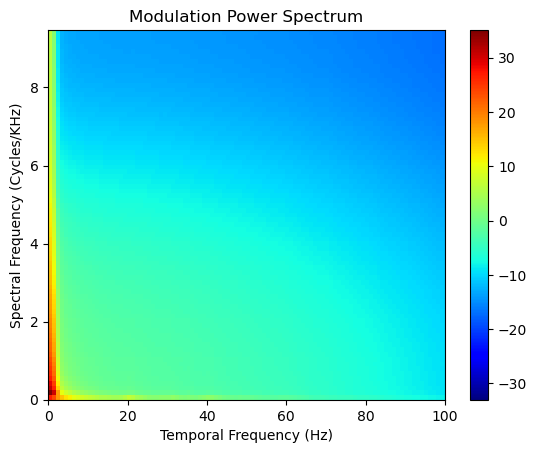

In [10]:
plt.figure()
plt.clf()
DBNOISE = 50
cmap = plt.get_cmap('jet')
ex = (output['wt'].min(), output['wt'].max(), output['wf'].min()*1e3, output['wf'].max()*1e3)
logMPS = 10.0*np.log10(mps_city.mean(2))
maxMPS = logMPS.max()
minMPS = maxMPS-DBNOISE
minMPS = logMPS.min()
logMPS[logMPS < minMPS] = minMPS
plt.imshow(logMPS, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap, extent=ex)
plt.ylabel('Spectral Frequency (Cycles/KHz)')
plt.xlabel('Temporal Frequency (Hz)')
plt.colorbar()
plt.ylim((0,output['wf'].max()*1e3))
plt.xlim((0,100))
plt.title('Modulation Power Spectrum')
plt.show()

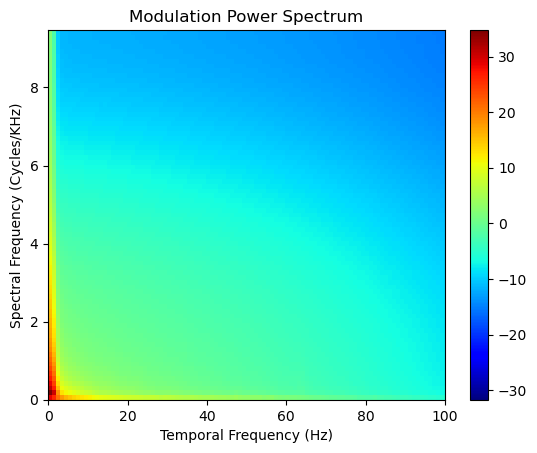

In [11]:
plt.figure()
plt.clf()
DBNOISE = 50
cmap = plt.get_cmap('jet')
ex = (output['wt'].min(), output['wt'].max(), output['wf'].min()*1e3, output['wf'].max()*1e3)
logMPS = 10.0*np.log10(mps_nature.mean(2))
maxMPS = logMPS.max()
minMPS = maxMPS-DBNOISE
minMPS = logMPS.min()
logMPS[logMPS < minMPS] = minMPS
plt.imshow(logMPS, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap, extent=ex)
plt.ylabel('Spectral Frequency (Cycles/KHz)')
plt.xlabel('Temporal Frequency (Hz)')
plt.colorbar()
plt.ylim((0,output['wf'].max()*1e3))
plt.xlim((0,100))
plt.title('Modulation Power Spectrum')
plt.show()

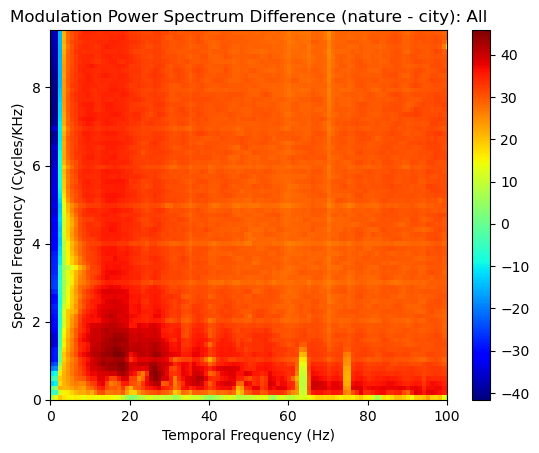

In [12]:
cmap = plt.get_cmap('jet')
ex = (output['wt'].min(), output['wt'].max(), output['wf'].min()*1e3, output['wf'].max()*1e3)
plt.imshow(statistic_all, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap, extent=ex)
plt.ylabel('Spectral Frequency (Cycles/KHz)')
plt.xlabel('Temporal Frequency (Hz)')
plt.colorbar()
plt.ylim((0,output['wf'].max()*1e3))
plt.xlim((0,100))
plt.title('Modulation Power Spectrum Difference (nature - city): All')
plt.show()

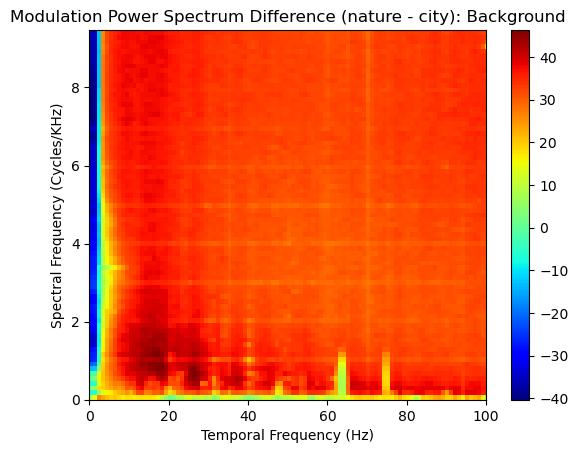

In [13]:
cmap = plt.get_cmap('jet')
ex = (output['wt'].min(), output['wt'].max(), output['wf'].min()*1e3, output['wf'].max()*1e3)
plt.imshow(statistic_bg, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap, extent=ex)
plt.ylabel('Spectral Frequency (Cycles/KHz)')
plt.xlabel('Temporal Frequency (Hz)')
plt.colorbar()
plt.ylim((0,output['wf'].max()*1e3))
plt.xlim((0,100))
plt.title('Modulation Power Spectrum Difference (nature - city): Background')
plt.show()

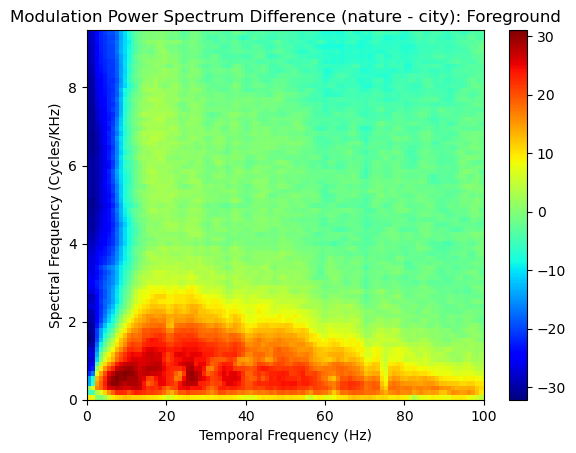

In [14]:
cmap = plt.get_cmap('jet')
ex = (output['wt'].min(), output['wt'].max(), output['wf'].min()*1e3, output['wf'].max()*1e3)
plt.imshow(statistic_fg, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap, extent=ex)
plt.ylabel('Spectral Frequency (Cycles/KHz)')
plt.xlabel('Temporal Frequency (Hz)')
plt.colorbar()
plt.ylim((0,output['wf'].max()*1e3))
plt.xlim((0,100))
plt.title('Modulation Power Spectrum Difference (nature - city): Foreground')
plt.show()